# Heart Disease Use 

## Overview

What is heart (cardiovascular) disease?
The heart is like any other muscle in body. It needs an adequate blood supply to provide oxygen so that the muscle can contract and pump blood to the rest of the body. Not only does the heart pump blood to the rest of the body, it also pumps blood to itself via the coronary arteries. These arteries originate from the base of the aorta (the major blood vessel that carries oxygenated blood from the heart) and then branch out along the surface of the heart.

When one or more coronary arteries narrow, it may make it difficult for adequate blood to reach the heart, especially during exercise. This can cause the heart muscle to ache like any other muscle in the body. Should the arteries continue to narrow, it may take less activity to stress the heart and provoke symptoms. The classic symptoms of chest pain or pressure and shortness of breath that often spreads to the shoulders, arms, and/or neck due to atherosclerotic heart disease (ASHD) or coronary artery disease (CAD) are called angina.

Should one of the coronary arteries become completely blocked -- usually due to a plaque that ruptures and causes a blood clot to form -- blood supply to part of the heart may be lost. This causes a piece of heart muscle to die. This is called a heart attack or myocardial infarction (myo=muscle + cardia=heart + infarction= tissue death).

citated from: https://www.medicinenet.com/heart_disease_coronary_artery_disease/article.htm

###  Heart disease describes a range of conditions that affect your heart. Heart diseases include:

+ Blood vessel disease, such as coronary artery disease
+ Heart rhythm problems (arrhythmias)
+ Heart defects you're born with (congenital heart defects)
+ Heart valve disease
+ Disease of the heart muscle
+ Heart infection
+ Many forms of heart disease can be prevented or treated with healthy lifestyle choices.

### Signs and symptoms can include:

* Chest pain, chest tightness, chest pressure and chest discomfort (angina)
* Shortness of breath
* Pain, numbness, weakness or coldness in your legs or arms if the blood vessels in those parts of your body are narrowed
* Pain in the neck, jaw, throat, upper abdomen or back

citated: https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

##### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import scipy
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
hdf = pd.read_csv('heart_disease_practiceproject.csv')

In [3]:
hdf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Description of columns

* age: Age in years (Continuous)
The observation of age in ths dataset is between 35 to 77 years, its a common column which may show a relation of age with whether a person is likely to have an hearth disese or not.

* sex: Male or female - 1= male | 0= female

The observation is between the chances of which gender is vulnerable to heart disease.

* thestbps: Resting blood pressure (Continuous value in mmHg)

Blood pressure is a measure of the force that your heart uses to pump blood around your body. 
Optimal blood pressure typically is defined as 120 mm Hg systolic — which is the pressure as your heart beats — over 80 mm Hg diastolic — which is the pressure as your heart relaxes. For your resting heart rate, the target is between 60 and 100 beats per minute (BPM).

* cp: Chest pain type - 1= typical type 1 | 2= typical type angina | 3= non-angina pain | 4= asymptomatic
determines the chest pain, values ranging in between 1 to 4 indicating type of pain
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
 
* chol: Serum cholesterol (Continuous value in mm/dL)
 Cholesterol is a waxy, fat-like substance that's found in all the cells of our body. Our body needs some cholesterol to make hormones, vitamin D, and substances that help you digest foods. The body makes all the cholesterol it needs. It is also found in foods from animal sources such as egg yolks,meat & cheese. A high cholestrol level can lead to various heart diseases. There are 2 types of cholestrol, LDL (“bad” cholesterol), HDL (“good” cholesterol). Measuring both and triglycerides will give you a number called your total blood cholesterol, or serum cholesterol. Serum cholesterol levels can help the doctor figure out the risk for developing heart disease in the next 10 years. 
 
* fbs: Fasting blood sugar - 1≥120 mg/dL | 0≤120 mg/d
Fsting blood glucose/sugar is a test to determine how much glucose (sugar) is in a blood sample after an overnight fast. The fasting blood glucose test is commonly used to detect diabetes mellitus. The test is done in the morning, before the person has eaten. The normal range for blood glucose is 70 to 100 mg/dl. Levels between 100 and 126 mg/dl are referred to as impaired fasting glucose or pre-diabetes. Diabetes is typically diagnosed when fasting blood glucose levels are 126 mg/dl or higher. Ths figures can show us the risk of contracting heart disease with a diabetic patient.

* restecg: Resting electrographic results - 0= normal | 1= having ST-T wave abnormal | 2= left ventricular hypertrophy |
The electrocardiogram is a recording of the electrical activity of the heart as it undergoes excitation (depolarization) and recovery (polarization) to initiate each beat of the heart. 

* thalach: Maximum heart rate achieved (Continuous value)
Maximum heart rate is the maximum number of beats made by your heart in 1 minute of effort. When walking quickly, you will be in an endurance zone, with a heart rate of between 60% and 75% of your maximum heart rate (MHR). Knowing your rate means listening to your body.
*** The range for this column differ with age.

* old peak: ST depression induced by exercise relative to rest(Continuous value
In a cardiac stress test, an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia, while an exercise stress test requires an ST depression of at least 2 mm to significantly indicate reversible ischaemia.

* exang: Exercise induced angina - 0= no | 1= yes
Angina occurs when there isn't enough oxygen-rich blood flowing to part of your heart. Angina is caused by narrowed coronary arteries, This column represents if angina was induced through exercise  while testing for heartdisease.

* ca: Number of major vessels colored by fluoroscopy - 0–3 value
Describes the number of major vessels colored by flouroscopy ranging between 0 - 3

* slope: Slope of the peak exercise ST segment- 1= unsloping | 2= flat | 3= downsloping
The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope ( slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease. This clumn contains dataset between 1 - 3 representing the heart rate slope.
* thal: Defect type - 3= normal | 6= fixed | 7= reversible defect |
displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect

* num: 
Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.
Checked the info of the dataset from - (https://towardsdatascience.com/heart-disease-prediction-73468d630cfc)


In [4]:
hdf.shape

(200, 14)

In [5]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [6]:
hdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

The dataset shows no null values but there is special character '?' present in the whole dataset, replacing the same with nan values.

In [7]:
hdf=hdf.replace('?',np.nan)
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
hdf.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [9]:
hdf.isna().mean().round(4) * 100  ### checking missing data percentage

age          0.0
sex          0.0
cp           0.0
trestbps    28.0
chol         3.5
fbs          3.5
restecg      0.0
thalach     26.5
exang       26.5
oldpeak     28.0
slope       51.0
ca          99.0
thal        83.0
num          0.0
dtype: float64

#### Dropping column ['ca'] & ['thal] as the % of missing data is above 80%

In [10]:
hdf_1=hdf.drop(['ca','thal'],axis = 1)
hdf_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,0


In [11]:
hdf_2=hdf_1.astype('float64',copy = True)

In [12]:
hdf_2.fillna(method='ffill', inplace=True)

In [13]:
hdf_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,1.0
196,62.0,1.0,1.0,127.0,139.0,0.0,1.0,154.0,0.0,0.0,2.0,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,2.0
198,58.0,1.0,4.0,122.0,385.0,1.0,2.0,100.0,0.0,0.0,2.0,0.0


In [14]:
hdf.chol.values

array(['260', '209', '218', '228', '213', '0', '236', '0', '0', '267',
       '166', '0', '0', '0', '0', '220', '177', '236', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '186', '100', '228', '0', '171', '230',
       '0', '0', '0', '281', '0', '203', '0', '0', '0', '0', '0', '277',
       '0', '233', '0', '0', '240', '0', '0', '153', '224', '0', '0', '0',
       '316', '0', '0', '218', '0', '311', '0', '0', '0', '270', '0', '0',
       '217', '214', '214', '252', '220', '214', '203', '0', '339', '216',
       '276', '458', '241', '384', '297', '248', '308', '208', '227',
       '210', '245', '225', '240', '0', '198', '195', '267', '161', '258',
       '0', '0', '195', '235', '0', '305', '223', '282', '349', nan,
       '160', '236', '312', '283', '142', '211', '218', '306', '186',
       '252', '222', '0', '0', '258', '202', '197', '204', nan, '274',
       '192', '298', '272', '220', '200', '261', '181', '260', '220',
       '221', '216', '175', '219', '310', '208', '232', '27

In [15]:
hdf_2[hdf_2['chol'] == 0 ]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
5,66.0,1.0,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,1.0,0.0
7,60.0,1.0,3.0,180.0,0.0,0.0,1.0,140.0,1.0,1.5,2.0,0.0
8,60.0,1.0,3.0,120.0,0.0,0.0,0.0,141.0,1.0,2.0,1.0,3.0
11,59.0,1.0,4.0,140.0,0.0,0.0,1.0,117.0,1.0,1.0,2.0,1.0
12,62.0,1.0,4.0,110.0,0.0,0.0,0.0,120.0,1.0,0.5,2.0,1.0
13,63.0,1.0,3.0,110.0,0.0,0.0,2.0,120.0,1.0,0.5,2.0,1.0
14,57.0,1.0,4.0,128.0,0.0,1.0,1.0,148.0,1.0,1.0,2.0,1.0
18,63.0,1.0,4.0,126.0,0.0,0.0,1.0,120.0,0.0,1.5,3.0,0.0
19,60.0,1.0,4.0,152.0,0.0,0.0,1.0,118.0,1.0,0.0,3.0,0.0
20,58.0,1.0,4.0,116.0,0.0,0.0,0.0,124.0,0.0,1.0,1.0,2.0


In [16]:
hdf_2['chol'].replace(0,np.NaN, inplace = True)

In [17]:
hdf_2.chol.values

array([260., 209., 218., 228., 213.,  nan, 236.,  nan,  nan, 267., 166.,
        nan,  nan,  nan,  nan, 220., 177., 236.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan, 186., 100., 228.,  nan, 171., 230.,
        nan,  nan,  nan, 281.,  nan, 203.,  nan,  nan,  nan,  nan,  nan,
       277.,  nan, 233.,  nan,  nan, 240.,  nan,  nan, 153., 224.,  nan,
        nan,  nan, 316.,  nan,  nan, 218.,  nan, 311.,  nan,  nan,  nan,
       270.,  nan,  nan, 217., 214., 214., 252., 220., 214., 203.,  nan,
       339., 216., 276., 458., 241., 384., 297., 248., 308., 208., 227.,
       210., 245., 225., 240.,  nan, 198., 195., 267., 161., 258.,  nan,
        nan, 195., 235.,  nan, 305., 223., 282., 349., 349., 160., 236.,
       312., 283., 142., 211., 218., 306., 186., 252., 222.,  nan,  nan,
       258., 202., 197., 204., 204., 274., 192., 298., 272., 220., 200.,
       261., 181., 260., 220., 221., 216., 175., 219., 310., 208., 232.,
       273., 203., 182., 274., 204., 270., 292., 17

In [18]:
hdf_2['chol'].fillna(method='ffill', inplace=True)

In [19]:
hdf_2['chol'].values

array([260., 209., 218., 228., 213., 213., 236., 236., 236., 267., 166.,
       166., 166., 166., 166., 220., 177., 236., 236., 236., 236., 236.,
       236., 236., 236., 236., 236., 186., 100., 228., 228., 171., 230.,
       230., 230., 230., 281., 281., 203., 203., 203., 203., 203., 203.,
       277., 277., 233., 233., 233., 240., 240., 240., 153., 224., 224.,
       224., 224., 316., 316., 316., 218., 218., 311., 311., 311., 311.,
       270., 270., 270., 217., 214., 214., 252., 220., 214., 203., 203.,
       339., 216., 276., 458., 241., 384., 297., 248., 308., 208., 227.,
       210., 245., 225., 240., 240., 198., 195., 267., 161., 258., 258.,
       258., 195., 235., 235., 305., 223., 282., 349., 349., 160., 236.,
       312., 283., 142., 211., 218., 306., 186., 252., 222., 222., 222.,
       258., 202., 197., 204., 204., 274., 192., 298., 272., 220., 200.,
       261., 181., 260., 220., 221., 216., 175., 219., 310., 208., 232.,
       273., 203., 182., 274., 204., 270., 292., 17

In [20]:
hdf_2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [21]:
hdf_2.trestbps.values

array([140., 130., 132., 142., 110., 120., 150., 180., 120., 160., 126.,
       140., 110., 110., 128., 120., 170., 110., 126., 152., 116., 120.,
       130., 130., 128., 130., 130., 130., 120., 120., 120., 124., 160.,
         0., 122., 144., 144., 120., 120., 154., 120., 125., 125., 104.,
       104., 136., 122., 128., 128., 134., 120., 120., 152., 124., 126.,
       138., 154., 154., 154., 178., 178., 110., 130., 170., 126., 140.,
       142., 120., 120., 120., 110., 140., 140., 136., 120., 170., 130.,
       130., 142., 142., 132., 146., 160., 135., 136., 130., 140., 140.,
       158., 158., 136., 106., 120., 110., 110., 160., 160., 112., 122.,
       130., 150., 150., 102.,  96., 130., 120., 144., 124., 150., 150.,
       150., 150., 150., 150., 150., 150., 116., 110., 125., 125., 125.,
       150., 130., 110., 110., 104., 138., 170., 140., 140., 132., 142.,
       112., 112., 172., 120., 120., 120., 155., 150., 160., 160., 160.,
       134., 134., 134., 140., 140., 144., 144., 15

In [22]:
hdf_2[hdf_2['trestbps'] == 0 ]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
33,55.0,1.0,3.0,0.0,230.0,0.0,0.0,155.0,0.0,1.5,2.0,3.0


In [23]:
hdf_2['trestbps'].replace(0,np.NaN, inplace = True)


In [24]:
hdf_2.trestbps.values

array([140., 130., 132., 142., 110., 120., 150., 180., 120., 160., 126.,
       140., 110., 110., 128., 120., 170., 110., 126., 152., 116., 120.,
       130., 130., 128., 130., 130., 130., 120., 120., 120., 124., 160.,
        nan, 122., 144., 144., 120., 120., 154., 120., 125., 125., 104.,
       104., 136., 122., 128., 128., 134., 120., 120., 152., 124., 126.,
       138., 154., 154., 154., 178., 178., 110., 130., 170., 126., 140.,
       142., 120., 120., 120., 110., 140., 140., 136., 120., 170., 130.,
       130., 142., 142., 132., 146., 160., 135., 136., 130., 140., 140.,
       158., 158., 136., 106., 120., 110., 110., 160., 160., 112., 122.,
       130., 150., 150., 102.,  96., 130., 120., 144., 124., 150., 150.,
       150., 150., 150., 150., 150., 150., 116., 110., 125., 125., 125.,
       150., 130., 110., 110., 104., 138., 170., 140., 140., 132., 142.,
       112., 112., 172., 120., 120., 120., 155., 150., 160., 160., 160.,
       134., 134., 134., 140., 140., 144., 144., 15

In [25]:
hdf_2['trestbps'].fillna(method='ffill',inplace = True)

In [26]:
hdf_2['trestbps'].values

array([140., 130., 132., 142., 110., 120., 150., 180., 120., 160., 126.,
       140., 110., 110., 128., 120., 170., 110., 126., 152., 116., 120.,
       130., 130., 128., 130., 130., 130., 120., 120., 120., 124., 160.,
       160., 122., 144., 144., 120., 120., 154., 120., 125., 125., 104.,
       104., 136., 122., 128., 128., 134., 120., 120., 152., 124., 126.,
       138., 154., 154., 154., 178., 178., 110., 130., 170., 126., 140.,
       142., 120., 120., 120., 110., 140., 140., 136., 120., 170., 130.,
       130., 142., 142., 132., 146., 160., 135., 136., 130., 140., 140.,
       158., 158., 136., 106., 120., 110., 110., 160., 160., 112., 122.,
       130., 150., 150., 102.,  96., 130., 120., 144., 124., 150., 150.,
       150., 150., 150., 150., 150., 150., 116., 110., 125., 125., 125.,
       150., 130., 110., 110., 104., 138., 170., 140., 140., 132., 142.,
       112., 112., 172., 120., 120., 120., 155., 150., 160., 160., 160.,
       134., 134., 134., 140., 140., 144., 144., 15

In [27]:
hdf_3=hdf_2.astype('int64',copy = True)

In [28]:
hdf_3.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
num         int64
dtype: object

In [29]:
## For visualizaion purpose we will split the target variable into 2 categories, 0 = absent & 1 = present of heart disease
newcol=[]
i=0
while i <= len(hdf_3)-1:
    if hdf_3['num'].iloc[i]==0:
        newcol.append(0)
    else:
        newcol.append(1)
    i+=1
##newcol
hdf_3['targetcol']=newcol
hdf_3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,targetcol
0,63,1,4,140,260,0,1,112,1,3,2,2,1
1,44,1,4,130,209,0,1,127,0,0,2,0,0
2,60,1,4,132,218,0,1,140,1,1,3,2,1
3,55,1,4,142,228,0,1,149,1,2,1,1,1
4,66,1,3,110,213,1,2,99,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,1,1
196,62,1,1,127,139,0,1,154,0,0,2,0,0
197,55,1,4,122,223,1,1,100,0,0,2,2,1
198,58,1,4,122,385,1,2,100,0,0,2,0,0


In [30]:
a=hdf_3.describe()
a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,targetcol
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,135.380000,239.260000,0.355000,0.735000,122.680000,0.635000,1.15500,2.12500,1.520000,0.745000
std,7.811697,0.171015,0.795701,18.149175,49.374198,0.479714,0.683455,21.749316,0.482638,1.10775,0.64143,1.219441,0.436955
min,35.000000,0.000000,1.000000,96.000000,100.000000,0.000000,0.000000,69.000000,0.000000,0.00000,1.00000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,121.500000,209.750000,0.000000,0.000000,108.000000,0.000000,0.00000,2.00000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,131.000000,233.000000,0.000000,1.000000,120.000000,1.000000,1.00000,2.00000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,150.000000,270.000000,1.000000,1.000000,140.000000,1.000000,2.00000,3.00000,3.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.00000,3.00000,4.000000,1.000000


###### Observations:

* Min to max age range from 35 to 77 years with mean of 59.35 & std of 7.811.
* Mean of cp = 3.50 | std = 0.795 | min to max = 0 to 4
* trestbps mean = 135 | std = 18, there in difference between 75th percentil & max value indicating skewness.
* Mean of chol = 239.26 | std = 49.37 | There is difference bettwen 75th percentile & max value indicating skewed datapoint.
* Mean of thalach = 122.68 | std = 21.75, min to max value ranges from 69 to 180. there is a wide difference between max value & 75th percentile indicating skewded data & also presence of outliers.

## Data Visualizations

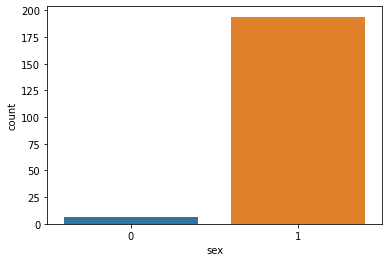

1    194
0      6
Name: sex, dtype: int64


In [31]:
plt.figure(figsize = (6,4))
sns.countplot(x='sex',data = hdf_3)
plt.show()
print(hdf_3.sex.value_counts())

The count of no.of. Male populaton is higher in this dataset than females. 

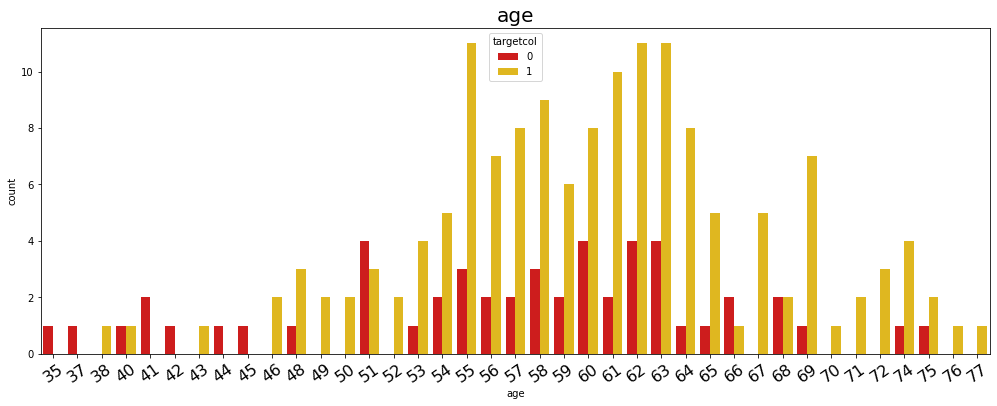

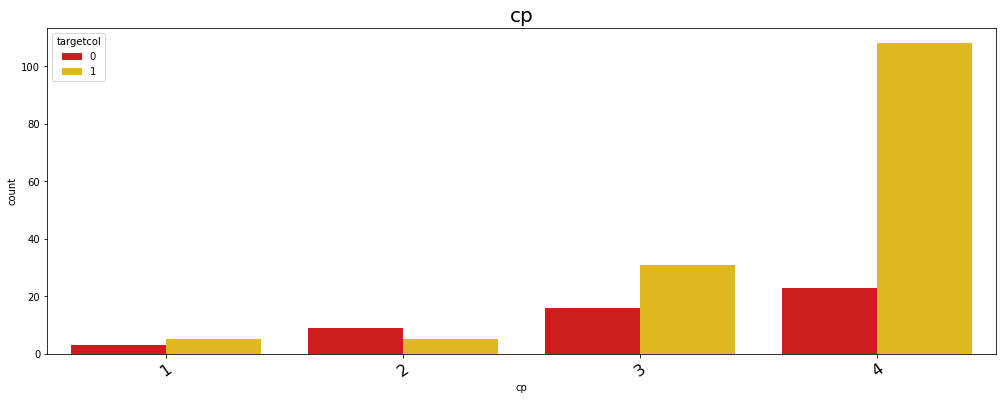

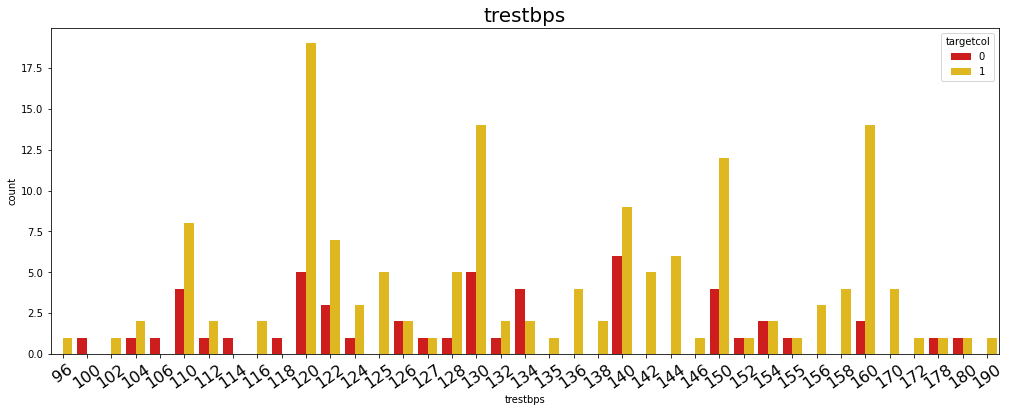

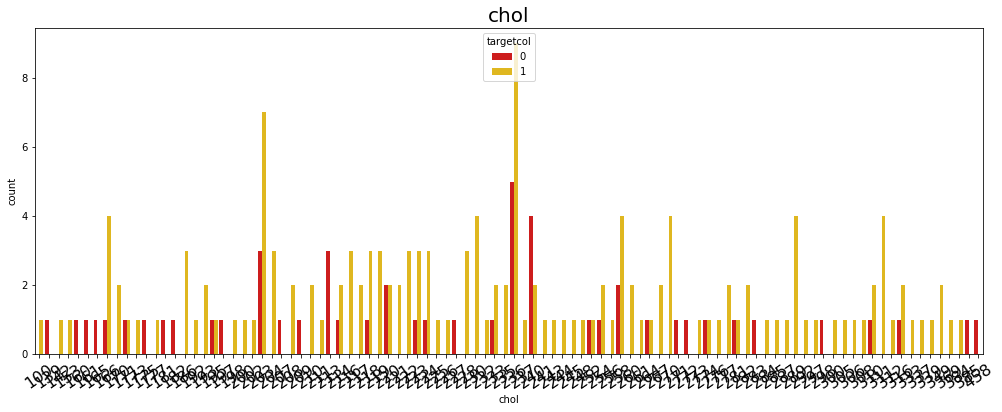

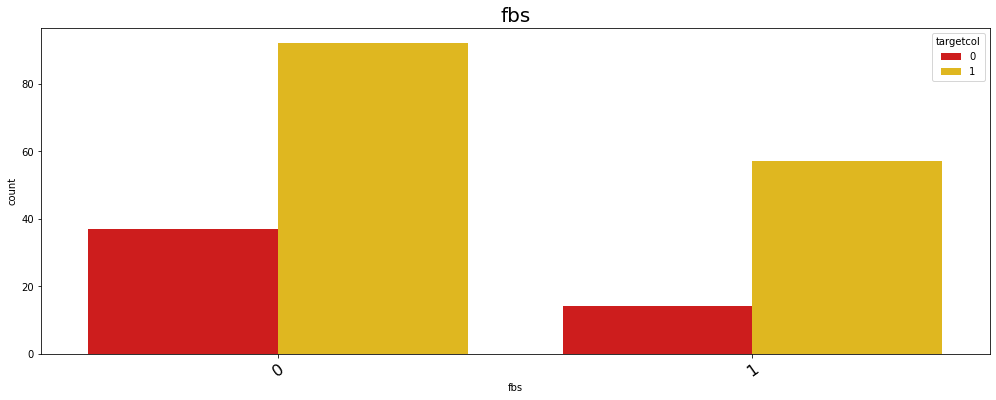

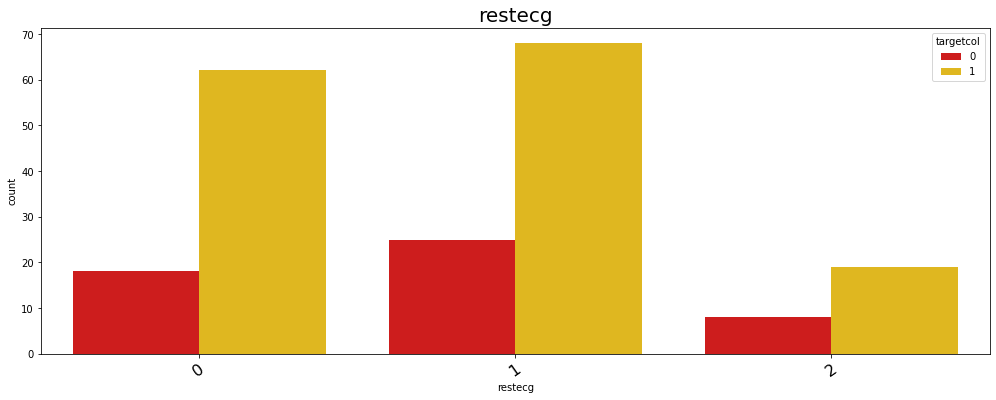

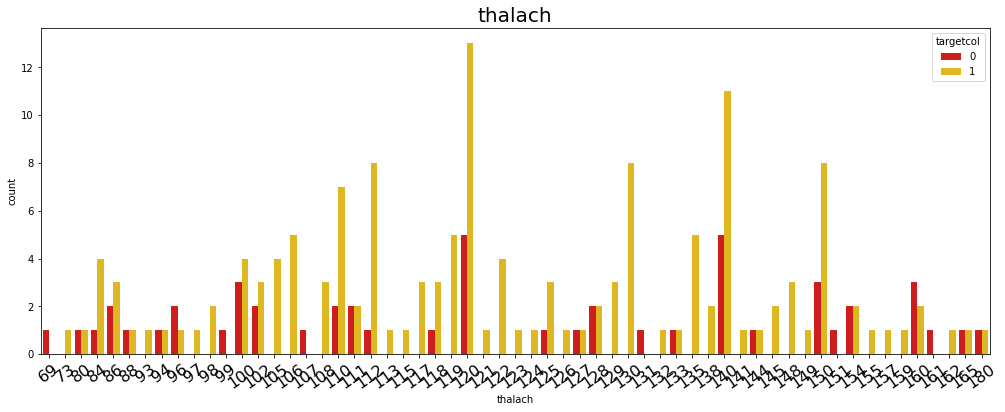

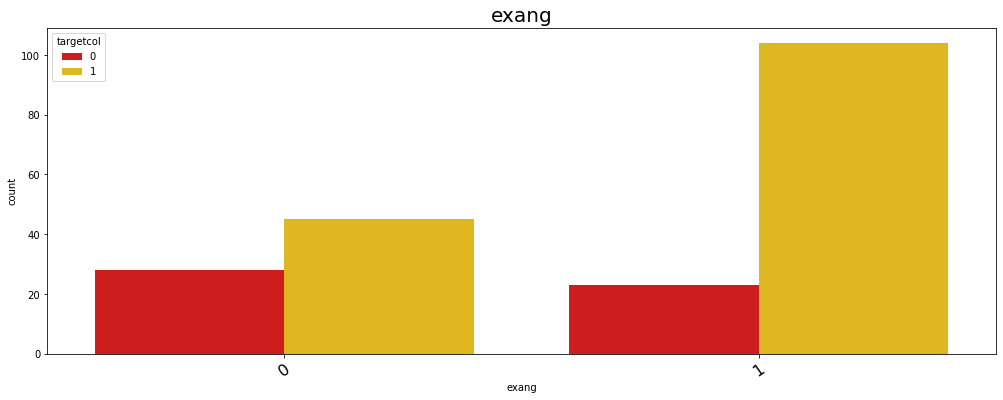

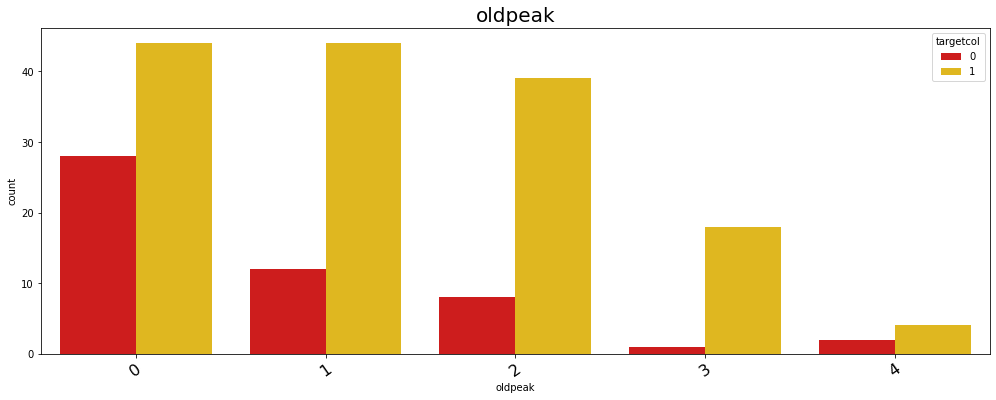

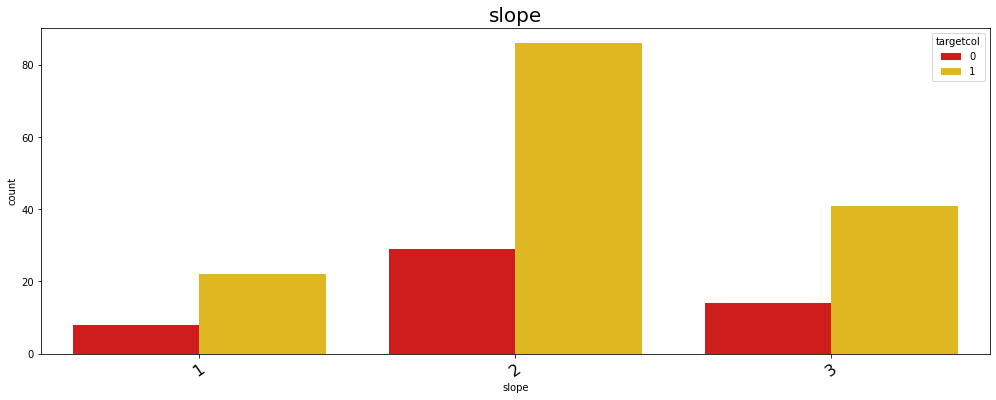

In [32]:
columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope',]
for col in columns:
    plt.figure(figsize=(17,6))
    sns.countplot(x=col, hue = 'targetcol', data = hdf_3, palette = 'hot')
    plt.title(col,fontsize=20)
    plt.xticks(rotation=35,fontsize = 16)
    plt.show()

* There is steep increase in the cases of heart disease from age 55 which then drops at age 56 7 has a fluctuating rise & fall till 59. POst 59 there is an upward trend & then sharp drop at 64 & then there is declining trend in positive cases.

* cp category 4 has hogher presence of heart diseases.
* With trestbps as 120 high count of cases with presence of heart disease.
* count with cat -1 restecg parameter has higher count of cases with active heart disease.
* With increase in thalach there is an increase in heart disease and reaches highest at around 120 then it starts to decline.
* exang - 1 reports more active heart disease cases.
* oldpeak has a spread from 0 to 2 then a downward trend at 3 & 4
* slope of 2 has highest no of cases wth heart disease.

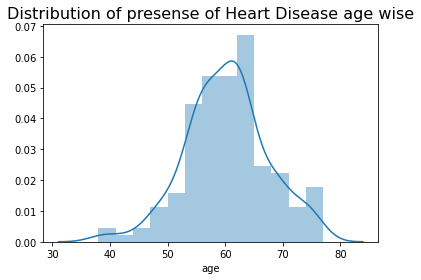

In [33]:
sns.distplot(hdf_3[hdf_3['targetcol']==1]['age'])
plt.title('Distribution of presense of Heart Disease age wise',fontsize = 16 )
plt.show()

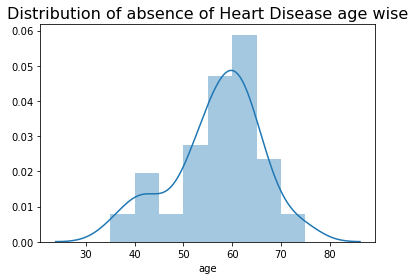

In [34]:
sns.distplot(hdf_3[hdf_3['targetcol']==0]['age'])
plt.title('Distribution of absence of Heart Disease age wise'  ,fontsize=16)
plt.show()

age             AxesSubplot(0.125,0.657941;0.133621x0.222059)
sex          AxesSubplot(0.285345,0.657941;0.133621x0.222059)
cp            AxesSubplot(0.44569,0.657941;0.133621x0.222059)
trestbps     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
chol         AxesSubplot(0.766379,0.657941;0.133621x0.222059)
fbs             AxesSubplot(0.125,0.391471;0.133621x0.222059)
restecg      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
thalach       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
exang        AxesSubplot(0.606034,0.391471;0.133621x0.222059)
oldpeak      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
slope              AxesSubplot(0.125,0.125;0.133621x0.222059)
num             AxesSubplot(0.285345,0.125;0.133621x0.222059)
targetcol        AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

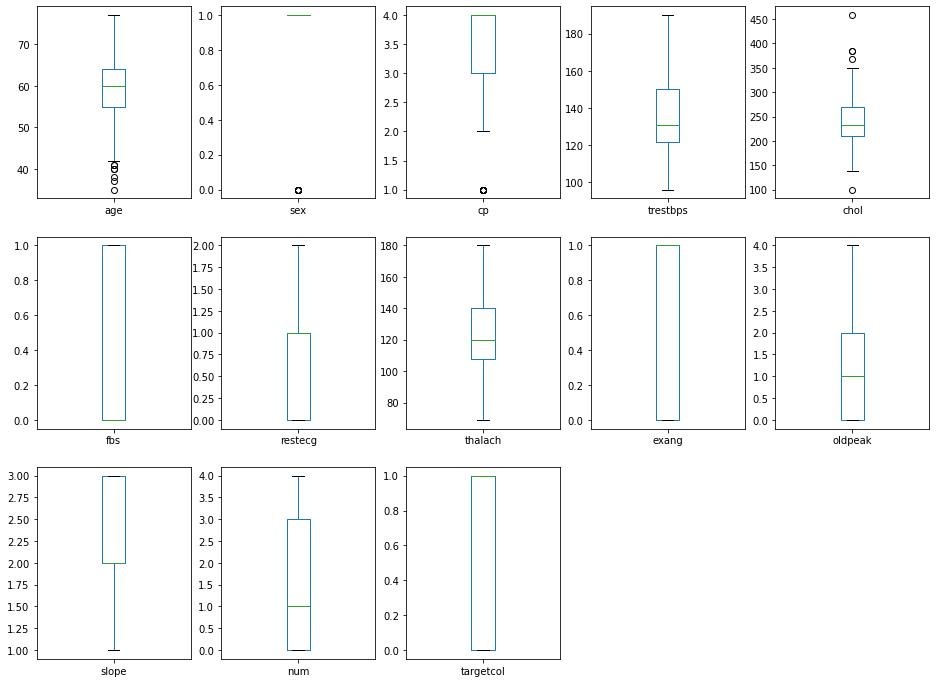

In [35]:
hdf_3.plot(kind='box',subplots=True,figsize = (16,12),layout=(3,5))

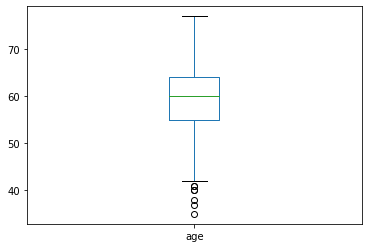

In [36]:
hdf_3['age'].plot(kind='box')

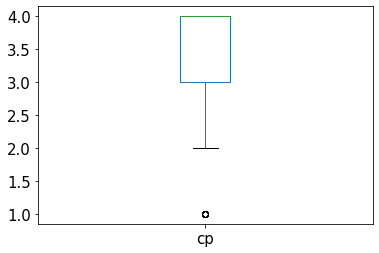

In [37]:
hdf_3['cp'].plot(kind='box',fontsize=15)

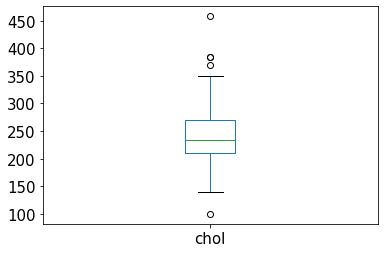

In [38]:
hdf_3['chol'].plot(kind='box',fontsize=15)

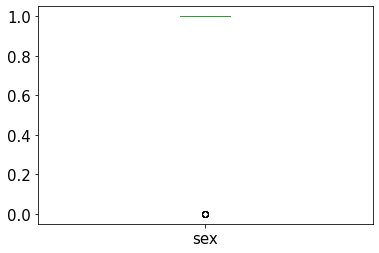

In [39]:
hdf_3['sex'].plot(kind='box',fontsize=15)

Outliers are visible in the above boxplots for columns - age, sex, cp, chol & thal. Lets check their scores.

In [40]:
hdf_4=hdf_3.drop(['targetcol'],axis=1)
hdf_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,2,0
2,60,1,4,132,218,0,1,140,1,1,3,2
3,55,1,4,142,228,0,1,149,1,2,1,1
4,66,1,3,110,213,1,2,99,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,1
196,62,1,1,127,139,0,1,154,0,0,2,0
197,55,1,4,122,223,1,1,100,0,0,2,2
198,58,1,4,122,385,1,2,100,0,0,2,0


In [41]:
corr=hdf_4.corr()

In [42]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,0.034230,-0.038280,0.094863,0.035318,0.146367,0.002400,-0.159705,0.095365,0.088936,-0.028833,0.287289
sex,0.034230,1.000000,0.038036,0.050643,-0.144878,-0.053290,0.060621,-0.005296,-0.011568,0.051195,0.034358,0.147470
cp,-0.038280,0.038036,1.000000,0.091036,0.086049,-0.037586,0.034790,-0.084695,0.194509,0.041874,0.033229,0.168210
trestbps,0.094863,0.050643,0.091036,1.000000,0.098216,0.169124,0.055153,0.134056,0.165070,0.140025,0.043382,0.216037
chol,0.035318,-0.144878,0.086049,0.098216,1.000000,0.135473,-0.056322,-0.009197,0.062837,0.066054,0.028799,0.092222
fbs,0.146367,-0.053290,-0.037586,0.169124,0.135473,1.000000,0.165761,0.034543,-0.175478,-0.037873,0.034704,0.052228
restecg,0.002400,0.060621,0.034790,0.055153,-0.056322,0.165761,1.000000,-0.025003,-0.020490,-0.091496,-0.038687,-0.032800
thalach,-0.159705,-0.005296,-0.084695,0.134056,-0.009197,0.034543,-0.025003,1.000000,-0.100703,0.119079,0.008285,-0.045799
exang,0.095365,-0.011568,0.194509,0.165070,0.062837,-0.175478,-0.020490,-0.100703,1.000000,0.388321,0.164351,0.204574
oldpeak,0.088936,0.051195,0.041874,0.140025,0.066054,-0.037873,-0.091496,0.119079,0.388321,1.000000,0.283773,0.338075


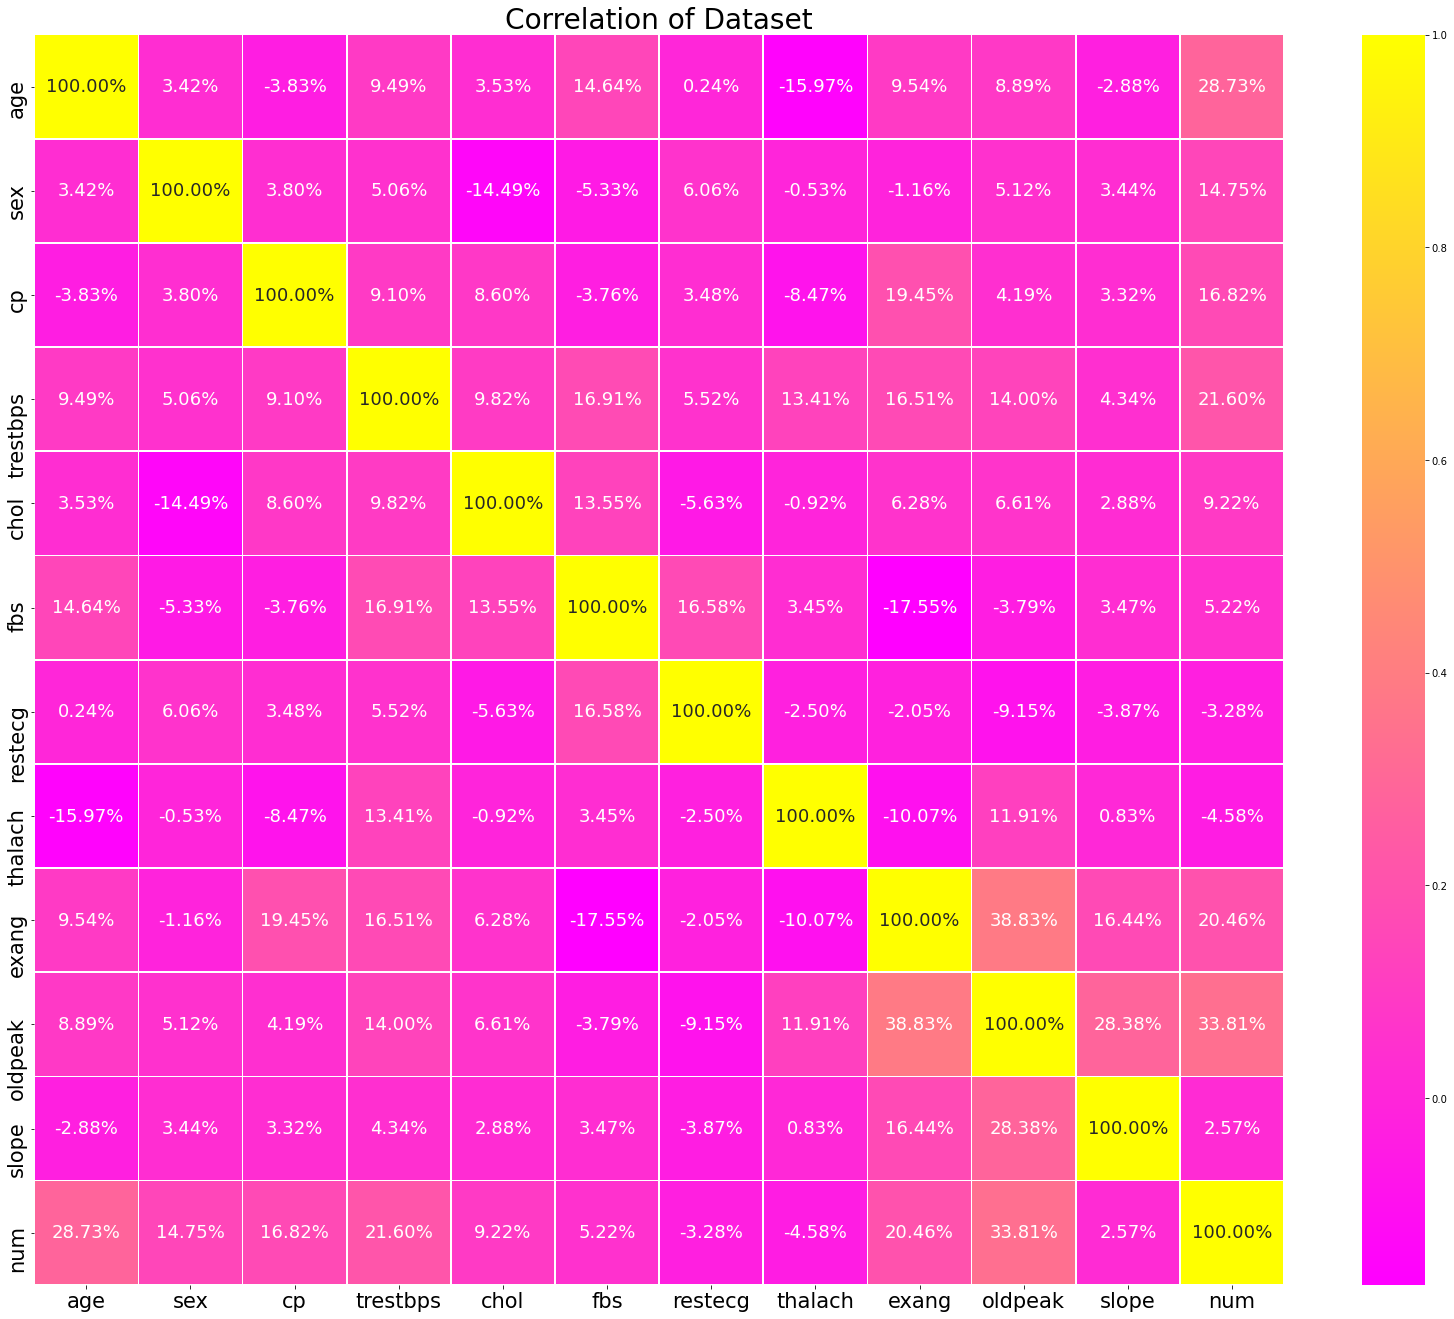

In [43]:
plt.figure(figsize=(28,23))
sns.heatmap(corr,annot=True,annot_kws={'size':18,},fmt = '.2%',cmap = 'spring',linewidths = .7)
plt.yticks(fontsize=21)
plt.xticks(fontsize=21)
plt.title('Correlation of Dataset', fontsize = 28)
plt.show()

###### Observation:
Positive:

* There is high corelation between target column with oldpeak @ 34%
* With age, target variable(num) have a 29% correlation.
* exang has a correlation of 21% with target column(num),cp , trestbps = 17% & highest +ve corr with oldpeak @ 39% 
* cp has a corr of 17% with trget variable
* sex has a corr of around 15% & around 21% with trestbps.
* target col has just 9.2 % correlation with chol
* slope has the least corr of around 3% 


Negative:

* thalach, restecg has a -ve corr with target column(num)@ -5% & 3.2%


### Outliers

#### Test using ZScore

In [44]:
from scipy.stats import zscore

In [45]:
z=np.abs(zscore(hdf_4))
threshold = 3
print(np.where(z>3))

(array([ 51,  66,  72,  76,  79,  80,  96,  97, 126, 128, 131, 133, 137,
       176, 190, 195, 196], dtype=int64), array([1, 2, 2, 2, 1, 4, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2], dtype=int64))


In [46]:
hdf_zscore=hdf_4[(z<3).all(axis=1)]
hdf_zscore.shape

(183, 12)

#### Test using IQR Method

In [47]:
Q1 = hdf_4.quantile(0.25)
Q3 = hdf_4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age          9.00
sex          0.00
cp           1.00
trestbps    28.50
chol        60.25
fbs          1.00
restecg      1.00
thalach     32.00
exang        1.00
oldpeak      2.00
slope        1.00
num          3.00
dtype: float64


In [48]:
hdf_iqr=hdf_4[~((hdf_4 < (Q1 - 1.5 * IQR)) | (hdf_4 > (Q3 + 1.5 * IQR))).any(axis=1)]
hdf_iqr.shape

(174, 12)

### Check % loss of data for removal of outliers

In [49]:
hdf_4.shape

(200, 12)

In [50]:
percentage_loss = ((200-183)/200)*100
print("% loss using zscore = ", percentage_loss)
percentage_loss1 = ((200 - 174)/200)*100
print("% loss of data using IQR",percentage_loss1)

% loss using zscore =  8.5
% loss of data using IQR 13.0


Lets check the outliers of dataset post removal of columns with corr rane -3 to + 3 with target variable

In [51]:
hdf_5=hdf_4.drop(['restecg','slope'],axis = 1)
hdf_5

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,112,1,3,2
1,44,1,4,130,209,0,127,0,0,0
2,60,1,4,132,218,0,140,1,1,2
3,55,1,4,142,228,0,149,1,2,1
4,66,1,3,110,213,1,99,1,1,0
...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,154,0,0,1
196,62,1,1,127,139,0,154,0,0,0
197,55,1,4,122,223,1,100,0,0,2
198,58,1,4,122,385,1,100,0,0,0


In [52]:
z=np.abs(zscore(hdf_5))
threshold = 3
print(np.where(z>3))
hdf_zscore_1=hdf_5[(z<3).all(axis=1)]
hdf_zscore_1.shape

(array([ 51,  66,  72,  76,  79,  80,  96,  97, 126, 128, 131, 133, 137,
       176, 190, 195, 196], dtype=int64), array([1, 2, 2, 2, 1, 4, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2], dtype=int64))


(183, 10)

In [53]:
Q1 = hdf_5.quantile(0.25)
Q3 = hdf_5.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
hdf_iqr_1=hdf_5[~((hdf_5 < (Q1 - 1.5 * IQR)) | (hdf_5 > (Q3 + 1.5 * IQR))).any(axis=1)]
hdf_iqr_1.shape

age          9.00
sex          0.00
cp           1.00
trestbps    28.50
chol        60.25
fbs          1.00
thalach     32.00
exang        1.00
oldpeak      2.00
num          3.00
dtype: float64


(174, 10)

####  There isnt much of a change is the percentage loss of dataset even with removal of datas with least corr with target. We proceed wth hdf_4 & use zscore for removal of outliers.

In [54]:
#Will use Zscore for removal of Outliers
hdf_final=hdf_zscore
hdf_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,2,0
2,60,1,4,132,218,0,1,140,1,1,3,2
3,55,1,4,142,228,0,1,149,1,2,1,1
4,66,1,3,110,213,1,2,99,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158,170,0,1,138,1,0,2,1
194,46,1,4,134,310,0,0,126,0,0,2,2
197,55,1,4,122,223,1,1,100,0,0,2,2
198,58,1,4,122,385,1,2,100,0,0,2,0


### Skewness

In [55]:
hdf_final.skew()

age        -0.314066
sex         0.000000
cp         -1.351565
trestbps    0.304360
chol        0.554115
fbs         0.686825
restecg     0.375332
thalach     0.179434
exang      -0.635451
oldpeak     0.684304
slope      -0.101398
num         0.256564
dtype: float64

There is skewness in all the categorical data hence not treating the same.

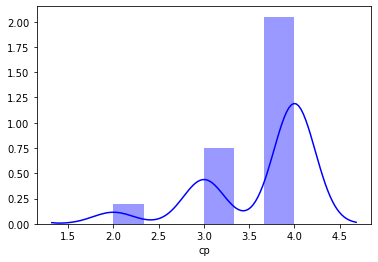

In [56]:
sns.distplot(hdf_final['cp'],  color = 'blue')

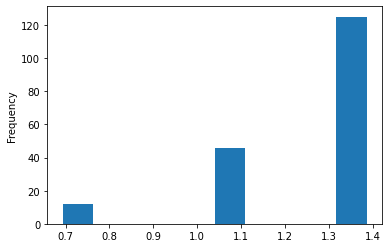

In [57]:
g = hdf_final['cp']=np.log(hdf_final['cp'])
g.plot.hist()

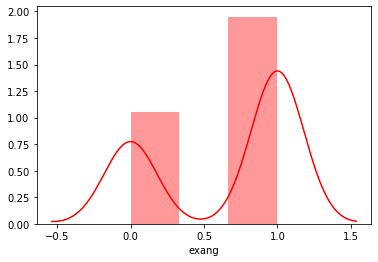

In [58]:
sns.distplot(hdf_final['exang'],  color = 'red')

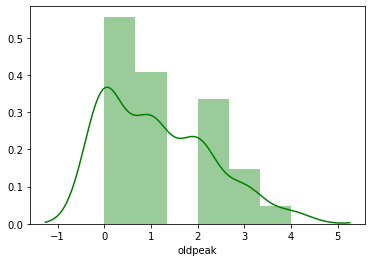

In [59]:
sns.distplot(hdf_final['oldpeak'],  color = 'green')

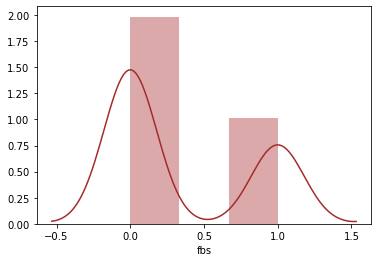

In [60]:
sns.distplot(hdf_final['fbs'],  color = 'brown')

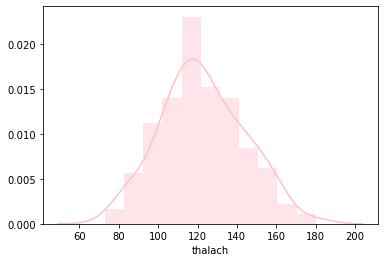

In [61]:
sns.distplot(hdf_final['thalach'],  color = 'pink')

#### Splitting the data for treating the skewness & modeling

In [62]:
x=hdf_final.iloc[:,0:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1.386294,140,260,0,1,112,1,3,2
1,44,1,1.386294,130,209,0,1,127,0,0,2
2,60,1,1.386294,132,218,0,1,140,1,1,3
3,55,1,1.386294,142,228,0,1,149,1,2,1
4,66,1,1.098612,110,213,1,2,99,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,1.386294,158,170,0,1,138,1,0,2
194,46,1,1.386294,134,310,0,0,126,0,0,2
197,55,1,1.386294,122,223,1,1,100,0,0,2
198,58,1,1.386294,122,385,1,2,100,0,0,2


In [63]:
y = hdf_final.iloc[:,-1]
y

0      2
1      0
2      2
3      1
4      0
      ..
193    1
194    2
197    2
198    0
199    1
Name: num, Length: 183, dtype: int64

### Scaling the data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Modeling

As there is multivariate output of target value using svc,gnb & dtc for initial modeling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [67]:
lgr = LogisticRegression()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
adb = AdaBoostClassifier()
rfc = RandomForestClassifier()

In [68]:
max_scr=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30)
    lgr.fit(x_train,y_train)
    pred_train=lgr.predict(x_train)
    pred_test=lgr.predict(x_test)
    print('At random_state = ', i, 'the model is running well' )
    print('Training score = ', accuracy_score(y_train,pred_train))
    print('Testing score = ', accuracy_score(y_test,pred_test))

At random_state =  0 the model is running well
Training score =  0.4765625
Testing score =  0.14545454545454545
At random_state =  1 the model is running well
Training score =  0.453125
Testing score =  0.2545454545454545
At random_state =  2 the model is running well
Training score =  0.4296875
Testing score =  0.32727272727272727
At random_state =  3 the model is running well
Training score =  0.46875
Testing score =  0.32727272727272727
At random_state =  4 the model is running well
Training score =  0.421875
Testing score =  0.2909090909090909
At random_state =  5 the model is running well
Training score =  0.46875
Testing score =  0.2727272727272727
At random_state =  6 the model is running well
Training score =  0.4453125
Testing score =  0.32727272727272727
At random_state =  7 the model is running well
Training score =  0.4765625
Testing score =  0.21818181818181817
At random_state =  8 the model is running well
Training score =  0.46875
Testing score =  0.2727272727272727
At r

At random_state =  75 the model is running well
Training score =  0.46875
Testing score =  0.2727272727272727
At random_state =  76 the model is running well
Training score =  0.46875
Testing score =  0.2909090909090909
At random_state =  77 the model is running well
Training score =  0.375
Testing score =  0.2909090909090909
At random_state =  78 the model is running well
Training score =  0.453125
Testing score =  0.2909090909090909
At random_state =  79 the model is running well
Training score =  0.4453125
Testing score =  0.3090909090909091
At random_state =  80 the model is running well
Training score =  0.484375
Testing score =  0.2909090909090909
At random_state =  81 the model is running well
Training score =  0.453125
Testing score =  0.3090909090909091
At random_state =  82 the model is running well
Training score =  0.484375
Testing score =  0.34545454545454546
At random_state =  83 the model is running well
Training score =  0.4921875
Testing score =  0.2545454545454545
At 

Training score =  0.484375
Testing score =  0.21818181818181817
At random_state =  152 the model is running well
Training score =  0.4609375
Testing score =  0.23636363636363636
At random_state =  153 the model is running well
Training score =  0.515625
Testing score =  0.2909090909090909
At random_state =  154 the model is running well
Training score =  0.4765625
Testing score =  0.23636363636363636
At random_state =  155 the model is running well
Training score =  0.4453125
Testing score =  0.3090909090909091
At random_state =  156 the model is running well
Training score =  0.4921875
Testing score =  0.23636363636363636
At random_state =  157 the model is running well
Training score =  0.484375
Testing score =  0.2545454545454545
At random_state =  158 the model is running well
Training score =  0.515625
Testing score =  0.23636363636363636
At random_state =  159 the model is running well
Training score =  0.4765625
Testing score =  0.3090909090909091
At random_state =  160 the mode

**** at random state 198 got the best score for the models hence using the same

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=198,test_size=0.30,stratify = y)

In [96]:
model = [lgr,svc,gnb,dtc,knc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of ' ,m, 'is' , accuracy_score(y_test,predm))
    print('Confusion Matrix of ',m, 'is' , confusion_matrix(y_test,predm))
    print('Classification report of ',m, 'is', classification_report(y_test,predm))
    cross_val=cross_val_score(m,x,y,cv = 7)
    print('Mean CV of rgc is: ',cross_val.mean(),'and','Std CV of rgc is: ', cross_val.std())
    print('\n')

Accuracy Score of  LogisticRegression() is 0.3090909090909091
Confusion Matrix of  LogisticRegression() is [[5 3 2 2 1]
 [5 6 2 2 0]
 [2 4 3 2 1]
 [1 6 1 3 1]
 [0 2 0 1 0]]
Classification report of  LogisticRegression() is               precision    recall  f1-score   support

           0       0.38      0.38      0.38        13
           1       0.29      0.40      0.33        15
           2       0.38      0.25      0.30        12
           3       0.30      0.25      0.27        12
           4       0.00      0.00      0.00         3

    accuracy                           0.31        55
   macro avg       0.27      0.26      0.26        55
weighted avg       0.32      0.31      0.31        55

Mean CV of rgc is:  0.31094831094831094 and Std CV of rgc is:  0.07220616232673317


Accuracy Score of  SVC() is 0.36363636363636365
Confusion Matrix of  SVC() is [[5 5 2 1 0]
 [2 6 3 4 0]
 [0 4 4 4 0]
 [1 4 2 5 0]
 [0 1 1 1 0]]
Classification report of  SVC() is               precision 

##### dtc & svc have better score than other models, will use regularizaion, ensembling & gridsearchcv for better results & best fit model.
* Accuracy Score of  DecisionTreeClassifier() is 0.32727272727272727
* Accuracy Score of  SVC() is 0.36363636363636365

### Regularization,GridSearchCV & Ensembling method

Checking if better score possible with Ensembling Method

In [97]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
rgc=RidgeClassifier()
rfc=RandomForestClassifier()
adb=AdaBoostClassifier()

In [99]:
parameters = {'alpha' : [0.001,0.01,0.1,1,10], 'fit_intercept' : [True,False],'normalize':[True,False],
             'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
clf=GridSearchCV(rgc,parameters,cv = 5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}


In [106]:
rgc=RidgeClassifier(alpha = 1,fit_intercept= 'True', normalize = 'True',solver = 'lsqr')
rgc.fit(x_train,y_train)
rgc.score(x_train,y_train)
pred_rgc=rgc.predict(x_test)
print('Accuracy Score = ',accuracy_score(y_test,pred_rgc))
print('Confusion Matrix = ', confusion_matrix(y_test, pred_rgc))
print('Classification Report = ',classification_report(y_test,pred_rgc))
cross_val = cross_val_score(rgc,x,y,cv =7 )
print('Cross Validation of RidgeClassifier = ', cross_val)
print('Mean CV of rgc is: ',cross_val.mean(),'and','Std CV of rgc is: ', cross_val.std())

Accuracy Score =  0.23636363636363636
Confusion Matrix =  [[4 8 0 1 0]
 [5 6 1 3 0]
 [3 6 0 3 0]
 [2 6 1 3 0]
 [0 2 0 1 0]]
Classification Report =                precision    recall  f1-score   support

           0       0.29      0.31      0.30        13
           1       0.21      0.40      0.28        15
           2       0.00      0.00      0.00        12
           3       0.27      0.25      0.26        12
           4       0.00      0.00      0.00         3

    accuracy                           0.24        55
   macro avg       0.15      0.19      0.17        55
weighted avg       0.19      0.24      0.20        55

Cross Validation of RidgeClassifier =  [0.33333333 0.46153846 0.26923077 0.26923077 0.34615385 0.19230769
 0.30769231]
Mean CV of rgc is:  0.3113553113553113 and Std CV of rgc is:  0.07744459528156035


In [102]:
parameters={'kernel':['linear','poly','rbf','sigmoid',],'gamma':['scale','auto'],}
clf=GridSearchCV(svc,parameters,)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [107]:
svc=SVC(gamma = 'scale',kernel = 'rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=rgc.predict(x_test)
print('Accuracy Score = ',accuracy_score(y_test,pred_svc))
print('Confusion Matrix = ', confusion_matrix(y_test, pred_svc))
print('Classification Report = ',classification_report(y_test,pred_svc))
cross_val = cross_val_score(svc,x,y,cv =7)
print('Cross Validation of RidgeClassifier = ', cross_val)
print('Mean CV of rgc is: ',cross_val.mean(),'and','Std CV of rgc is: ', cross_val.std())

Accuracy Score =  0.23636363636363636
Confusion Matrix =  [[4 8 0 1 0]
 [5 6 1 3 0]
 [3 6 0 3 0]
 [2 6 1 3 0]
 [0 2 0 1 0]]
Classification Report =                precision    recall  f1-score   support

           0       0.29      0.31      0.30        13
           1       0.21      0.40      0.28        15
           2       0.00      0.00      0.00        12
           3       0.27      0.25      0.26        12
           4       0.00      0.00      0.00         3

    accuracy                           0.24        55
   macro avg       0.15      0.19      0.17        55
weighted avg       0.19      0.24      0.20        55

Cross Validation of RidgeClassifier =  [0.37037037 0.23076923 0.46153846 0.23076923 0.30769231 0.34615385
 0.34615385]
Mean CV of rgc is:  0.32763532763532766 and Std CV of rgc is:  0.07521968747939006


In [105]:
parameters = {'n_estimators':[100,200,400,500,],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt','log2'],
             'min_samples_split': [2,3,5,7]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [108]:
rfc=RandomForestClassifier(n_estimators= 200,criterion='gini',max_features='sqrt',min_samples_split= 2)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy Score of Random FOrest Regressor = ', accuracy_score(y_test,pred_rfc))
print('Confusion Matrix ',confusion_matrix(y_test,pred_rfc))
print('Classification Report ',classification_report(y_test,pred_rfc))
cross_val = cross_val_score(rfc,x,y,cv =5 )
print('Cross Validation of RidgeClassifier = ', cross_val)
print('Mean CV of rgc is: ',cross_val.mean(),'and','Std CV of rgc is: ', cross_val.std())

Accuracy Score of Random FOrest Regressor =  0.38181818181818183
Confusion Matrix  [[4 5 4 0 0]
 [3 8 1 3 0]
 [0 3 7 1 1]
 [2 5 3 2 0]
 [1 2 0 0 0]]
Classification Report                precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.35      0.53      0.42        15
           2       0.47      0.58      0.52        12
           3       0.33      0.17      0.22        12
           4       0.00      0.00      0.00         3

    accuracy                           0.38        55
   macro avg       0.31      0.32      0.30        55
weighted avg       0.36      0.38      0.36        55

Cross Validation of RidgeClassifier =  [0.37837838 0.35135135 0.24324324 0.36111111 0.41666667]
Mean CV of rgc is:  0.35015015015015016 and Std CV of rgc is:  0.05791709960333389


In [110]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_depth':[100,200,400,500],
             'min_samples_split':[2,3,5,7],'max_features':['auto','sqrt','log2']}
clf=GridSearchCV(dtc,parameters,cv=7)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 200, 'max_features': 'log2', 'min_samples_split': 3, 'splitter': 'random'}


In [113]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth= 200,max_features= 'log2', 
                           min_samples_split=3, splitter='random')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('Accuracy Score = ',accuracy_score(y_test,pred_rgc))
print('Confusion Matrix = ', confusion_matrix(y_test, pred_rgc))
print('Classification Report = ',classification_report(y_test,pred_rgc))
cross_val = cross_val_score(rgc,x,y,cv =7 )
print('Cross Validation of DecisionTreeClassifier = ', cross_val)
print('Mean CV of DTC is: ',cross_val.mean(),'and','Std CV of DTC is: ', cross_val.std())

Accuracy Score =  0.23636363636363636
Confusion Matrix =  [[4 8 0 1 0]
 [5 6 1 3 0]
 [3 6 0 3 0]
 [2 6 1 3 0]
 [0 2 0 1 0]]
Classification Report =                precision    recall  f1-score   support

           0       0.29      0.31      0.30        13
           1       0.21      0.40      0.28        15
           2       0.00      0.00      0.00        12
           3       0.27      0.25      0.26        12
           4       0.00      0.00      0.00         3

    accuracy                           0.24        55
   macro avg       0.15      0.19      0.17        55
weighted avg       0.19      0.24      0.20        55

Cross Validation of DecisionTreeClassifier =  [0.33333333 0.46153846 0.26923077 0.26923077 0.34615385 0.19230769
 0.30769231]
Mean CV of DTC is:  0.3113553113553113 and Std CV of DTC is:  0.07744459528156035


In [117]:
parameters={'base_estimator':[dtc],
            'n_estimators': np.arange(10,300,10),'learning_rate': [0.01, 0.05, 0.1, 1],}
clf=GridSearchCV(adb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features='log2',
                       min_samples_split=3, splitter='random'), 'learning_rate': 0.1, 'n_estimators': 30}


In [118]:
adb=AdaBoostClassifier(base_estimator= DecisionTreeClassifier(criterion='entropy', max_depth=200, max_features='log2',
                       min_samples_split=3, splitter='random'),
                       n_estimators = 30, learning_rate = 0.1 )
adb.fit(x_train,y_train)
adb.score(x_train,y_train)
pred_adb=adb.predict(x_test)
print('Accuracy Score of AdaboostClassifier with ', accuracy_score(y_test,pred_adb))
print('Confusion Matrix of adb with ',confusion_matrix(y_test,pred_adb))
print('Classification Repor ',classification_report(y_test,pred_adb))
cross_val = cross_val_score(adb,x,y,cv =7 )
print('Cross Validation of DecisionTreeClassifier = ', cross_val)
print('Mean CV of DTC is: ',cross_val.mean(),'and','Std CV of DTC is: ', cross_val.std())

Accuracy Score of AdaboostClassifier with  0.38181818181818183
Confusion Matrix of adb with  [[7 3 2 1 0]
 [2 7 2 4 0]
 [2 1 5 4 0]
 [2 4 4 2 0]
 [0 1 1 1 0]]
Classification Repor                precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.44      0.47      0.45        15
           2       0.36      0.42      0.38        12
           3       0.17      0.17      0.17        12
           4       0.00      0.00      0.00         3

    accuracy                           0.38        55
   macro avg       0.30      0.32      0.31        55
weighted avg       0.36      0.38      0.37        55

Cross Validation of DecisionTreeClassifier =  [0.40740741 0.30769231 0.30769231 0.30769231 0.38461538 0.30769231
 0.42307692]
Mean CV of DTC is:  0.34940984940984937 and Std CV of DTC is:  0.04926806751012794


In [119]:
parameters= {'base_estimator':[rfc],
            'n_estimators': np.arange(10,300,10),'learning_rate': [0.01, 0.05, 0.1, 1],}
clf=GridSearchCV(adb,parameters,cv=7)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'base_estimator': RandomForestClassifier(max_features='sqrt', n_estimators=200), 'learning_rate': 1, 'n_estimators': 10}


In [120]:
adb1=AdaBoostClassifier(base_estimator= RandomForestClassifier(max_features='sqrt', n_estimators=200),
                        n_estimators= 10,learning_rate= 1,)
adb1.fit(x_train,y_train)
adb1.score(x_train,y_train)
pred_adb1=adb1.predict(x_test)
print('Accuracy Score of AdaboostClassifier with ', accuracy_score(y_test,pred_adb1))
print('Confusion Matrix of adb with ',confusion_matrix(y_test,pred_adb1))
print('Classification Repor ',classification_report(y_test,pred_adb1))
cross_val = cross_val_score(adb1,x,y,cv =7 )
print('Cross Validation of DecisionTreeClassifier = ', cross_val)
print('Mean CV of DTC is: ',cross_val.mean(),'and','Std CV of DTC is: ', cross_val.std())

Accuracy Score of AdaboostClassifier with  0.38181818181818183
Confusion Matrix of adb with  [[5 4 3 1 0]
 [2 8 1 4 0]
 [0 3 7 1 1]
 [2 5 4 1 0]
 [1 2 0 0 0]]
Classification Repor                precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.36      0.53      0.43        15
           2       0.47      0.58      0.52        12
           3       0.14      0.08      0.11        12
           4       0.00      0.00      0.00         3

    accuracy                           0.38        55
   macro avg       0.29      0.32      0.30        55
weighted avg       0.35      0.38      0.36        55

Cross Validation of DecisionTreeClassifier =  [0.37037037 0.42307692 0.19230769 0.34615385 0.42307692 0.30769231
 0.5       ]
Mean CV of DTC is:  0.3660968660968661 and Std CV of DTC is:  0.09138088211121011


In [128]:
parameters= {'base_estimator':[svc],'algorithm':['SAMME'],
            'n_estimators': np.arange(10,300,10),'learning_rate': [0.01, 0.05, 0.1, 1],}
clf=GridSearchCV(adb,parameters,cv=7)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'SAMME', 'base_estimator': SVC(), 'learning_rate': 0.01, 'n_estimators': 10}


In [129]:
adb2=AdaBoostClassifier(base_estimator= SVC(),algorithm='SAMME', n_estimators= 10,learning_rate= 0.01)
adb2.fit(x_train,y_train)
adb2.score(x_train,y_train)
pred_adb2=adb1.predict(x_test)
print('Accuracy Score of AdaboostClassifier with ', accuracy_score(y_test,pred_adb2))
print('Confusion Matrix of adb with ',confusion_matrix(y_test,pred_adb2))
print('Classification Repor ',classification_report(y_test,pred_adb2))
cross_val = cross_val_score(adb2,x,y,cv =7 )
print('Cross Validation of DecisionTreeClassifier = ', cross_val)
print('Mean CV of DTC is: ',cross_val.mean(),'and','Std CV of DTC is: ', cross_val.std())

Accuracy Score of AdaboostClassifier with  0.38181818181818183
Confusion Matrix of adb with  [[5 4 3 1 0]
 [2 8 1 4 0]
 [0 3 7 1 1]
 [2 5 4 1 0]
 [1 2 0 0 0]]
Classification Repor                precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.36      0.53      0.43        15
           2       0.47      0.58      0.52        12
           3       0.14      0.08      0.11        12
           4       0.00      0.00      0.00         3

    accuracy                           0.38        55
   macro avg       0.29      0.32      0.30        55
weighted avg       0.35      0.38      0.36        55

Cross Validation of DecisionTreeClassifier =  [0.2962963  0.30769231 0.26923077 0.26923077 0.26923077 0.26923077
 0.30769231]
Mean CV of DTC is:  0.28408628408628406 and Std CV of DTC is:  0.017510480068619428


The best fit model is achieved by using adaboostclassifier with base model as decisiontreeclassifier with 
* accuracy_sore = 0.38181818181818183
* confusion_matrix: 
* [5 4 3 1 0]
* [2 8 1 4 0]
* [0 3 7 1 1]
* [2 5 4 1 0]
* [1 2 0 0 0]
* Mean CV of DTC is:  0.3660968660968661 and Std CV of DTC is:  0.09138088211121011

## Serialization


In [131]:
import joblib

In [132]:
joblib.dump(adb1,'heart_disease_dataset.pkl')

['heart_disease_dataset.pkl']

# Conclusion

In [133]:
a=np.array(y_test)
p = np.array(adb1.predict(x_test))
print(a)
print('\n')
print(p)

[0 3 1 4 1 0 3 1 1 1 0 0 0 2 1 2 2 0 2 3 3 3 1 0 3 2 0 0 3 3 0 2 1 0 3 1 0
 2 2 1 3 1 2 1 2 1 3 1 2 3 0 4 1 2 4]


[0 2 1 1 0 0 1 1 1 3 1 1 1 3 1 4 2 1 1 0 1 2 2 2 1 2 0 2 3 1 2 2 1 0 1 1 0
 1 2 3 2 1 2 0 1 3 2 1 2 0 3 0 3 2 1]


In [134]:
heart_df=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
heart_df

,Original,Predicted
0,0,0
1,3,2
2,1,1
3,4,1
4,1,0
5,0,0
6,3,1
7,1,1
8,1,1
9,1,3
